In [2]:
import pandas as pd
from tqdm import tqdm

In [50]:
# CT_abdo_studies_df = pd.read_pickle('FMC_CTabdo_2015_2019.pkl')
# CT_abdo_studies_df = CT_abdo_studies_df[CT_abdo_studies_df['ModalitiesInStudy'].apply(lambda x: 'SR' in x)]
# CT_lumbar_series_df = pd.read_pickle('SAMI_CTlumbar_series_2015_2020.pkl')

CT_abdo_studies_df = pd.read_pickle('FMC_CTabdo_2015_2019.pkl')
CT_abdo_studies_df = CT_abdo_studies_df[CT_abdo_studies_df['ModalitiesInStudy'].apply(lambda x: 'SR' in x)]

CT_abdo_series_df = pd.read_pickle('FMC_CTabdomen_series_2015_2019.pkl') 


NameError: name 'CT_abdo_studies_df' is not defined

In [51]:
CT_abdo_series_df['SeriesDescription'].value_counts()[0:40]

Carestream PACS Reports                   18648
Scout                                     16010
Exam Summary                              13305
CT Abdomen and Pelvis                      9093
Thin slices of Series 202                  8512
Radiation Dose Information                 8131
PV Axial, iDose (3)                        7145
PV Coronal, iDose (3)                      7134
PV Sagittal, iDose (3)                     6455
KEY_IMAGES                                 6214
Dose Info                                  5553
KEY_IMAGES PR                              4197
MPR, AX PV, Axial                          3373
MPR, COR PV, Coronal                       3173
MPR, SAG PV, Sagittal                      3104
SURVIEW                                    2968
locator                                    2684
CT Abdomen and Pelvis Renal Colic          2349
CT Chest Abdomen Pelvis                    2311
CT Upper Abdomen and Pelvis w Contrast     2207
SUMMARY                                 

In [60]:

## Sagittal scans
CT_abdo_series_clean_df = CT_abdo_series_df

CT_abdo_series_clean_df = CT_abdo_series_clean_df[CT_abdo_series_clean_df['NumberOfSeriesRelatedInstances'].astype(int)<150]

CT_abdo_series_clean_df = CT_abdo_series_clean_df[
    CT_abdo_series_clean_df['SeriesDescription'].apply(lambda x: 
                                                              (
                                                                  ('pv' in str(x).lower())
                                                                  & ('sag' in str(x).lower())
                                                              )
                                                              & ('thins' not in str(x).lower())
                                                              & ('mar' not in str(x).lower())
                                                              & ('mpr' not in str(x).lower())
                                                              & ('mip' not in str(x).lower())
                                                              
                                                             )]

CT_abdo_series_clean_df.to_pickle('FMC_CTabdomen_series_sag_2015_2019.pkl')


## Coronal scans
CT_abdo_series_clean_df = CT_abdo_series_df

CT_abdo_series_clean_df = CT_abdo_series_clean_df[CT_abdo_series_clean_df['NumberOfSeriesRelatedInstances'].astype(int)<150]

CT_abdo_series_clean_df = CT_abdo_series_clean_df[
    CT_abdo_series_clean_df['SeriesDescription'].apply(lambda x: 
                                                              (
                                                                  ('pv' in str(x).lower())
                                                                  & ('cor' in str(x).lower())
                                                              )
                                                              & ('thins' not in str(x).lower())
                                                              & ('mar' not in str(x).lower())
                                                              & ('mpr' not in str(x).lower())
                                                              & ('mip' not in str(x).lower())
                                                              
                                                             )]

CT_abdo_series_clean_df.to_pickle('FMC_CTabdomen_series_cor_2015_2019.pkl')


## Coronal scans
CT_abdo_series_clean_df = CT_abdo_series_df

CT_abdo_series_clean_df = CT_abdo_series_clean_df[CT_abdo_series_clean_df['NumberOfSeriesRelatedInstances'].astype(int)<150]

CT_abdo_series_clean_df = CT_abdo_series_clean_df[
    CT_abdo_series_clean_df['SeriesDescription'].apply(lambda x: 
                                                              (
                                                                  ('pv' in str(x).lower())
                                                                  & ('ax' in str(x).lower())
                                                              )
                                                              & ('thins' not in str(x).lower())
                                                              & ('mar' not in str(x).lower())
                                                              & ('mpr' not in str(x).lower())
                                                              & ('mip' not in str(x).lower())
                                                              
                                                             )]

CT_abdo_series_clean_df.to_pickle('FMC_CTabdomen_series_ax_2015_2019.pkl')



In [61]:
c = pd.read_pickle('FMC_CTabdomen_series_ax_2015_2019.pkl')
len(c)

11571

In [59]:
c = pd.read_pickle('FMC_CTabdomen_series_sag_2015_2019.pkl')
len(c)

11513

<AxesSubplot:>

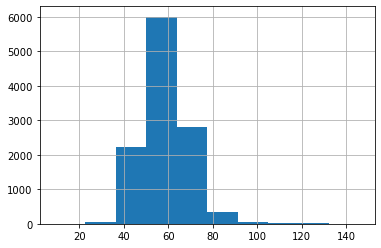

In [58]:
CT_abdo_series_clean_df['NumberOfSeriesRelatedInstances'].astype(int).hist()

In [57]:
CT_abdo_series_clean_df['SeriesDescription'].value_counts()[0:40]

PV Coronal, iDose (3)           7134
COR PV, iDose (3)               1546
PV Coronal                      1023
PV Body 5.000 Coronal            632
PV Coronal  Coronal              381
COR ABDO PV, iDose (3)           234
PV Coronal, iDose (6)            208
PV COR, iDose (3)                 88
PV Coronal, iDose (5)             31
COR PV                            16
PV ABDO COR 5MM                   13
PV Coronal Body Coronal           13
COR PV, iDose (6)                 11
PV CORONAL                        11
PV COR                            10
COR PV ABDO                       10
COR BARI PV, iDose (5)             8
PV ABDO COR                        8
PV Body 3.000 Coronal              7
CORONAL PV ABDO                    6
pv abdo cor 5mm                    6
PV ABDO Cor, iDose (3)             5
COR PV, iDose (5)                  5
COR PV BARI, iDose (6)             5
PV Coronal, iDose (4)              4
CORONAL STD THICK ABDOMEN PV       4
pv CTA 5.000 Coronal               4
P

In [76]:
# iterate through each study:
# for each study, look at series
# if MAR in one of the series, exclude study
# drop all MAR studies
# now iterate again and find thins

In [77]:
CT_lumbar_studies_df['drop'] = 0
CT_lumbar_series_df['drop'] = 0

for ind,study in tqdm(CT_lumbar_studies_df.iterrows(),total=len(CT_lumbar_studies_df)):
    
    # drop if screws/MAR
    if any( ( ('mar' in str(x).lower() and 'summary' not in str(x).lower()) or 
            ('screw' in str(x).lower()) )
           for x in CT_lumbar_series_df[CT_lumbar_series_df['AccessionNumber'] == study['AccessionNumber']]['SeriesDescription']):
    
        CT_lumbar_studies_df['drop'][ind] = 1
        CT_lumbar_series_df.loc[CT_lumbar_series_df['AccessionNumber'] == study['AccessionNumber'],'drop'] = 1
#         print(CT_lumbar_series_df[CT_lumbar_series_df['AccessionNumber'] == study['AccessionNumber']]['SeriesDescription'])

CT_lumbar_studies_clean_df = CT_lumbar_studies_df[CT_lumbar_studies_df['drop']==0]
CT_lumbar_series_clean_df = CT_lumbar_series_df[CT_lumbar_series_df['drop']==0]

# CT_lumbar_studies_clean_df.to_pickle('CT_lumbar_studies_clean_df.pkl')
# CT_lumbar_series_clean_df.to_pickle('CT_lumbar_series_clean_df.pkl')

  6%|████▍                                                                         | 924/16071 [00:13<04:12, 60.00it/s]<ipython-input-77-305b3a0d96f9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CT_lumbar_studies_df['drop'][ind] = 1
100%|████████████████████████████████████████████████████████████████████████████| 16071/16071 [04:37<00:00, 57.96it/s]


In [167]:
CT_lumbar_studies_clean_df = pd.read_pickle('CT_lumbar_studies_clean_df.pkl')
CT_lumbar_series_clean_df = pd.read_pickle('CT_lumbar_series_clean_df.pkl')

# iterate through series
# keep if modality = CT and instances > 100, or modality = SR
CT_lumbar_series_clean_df = CT_lumbar_series_clean_df[
    (CT_lumbar_series_clean_df['NumberOfSeriesRelatedInstances'].astype(int)>100) | (CT_lumbar_series_clean_df['Modality']=='SR')]

CT_lumbar_series_clean_df = CT_lumbar_series_clean_df[
    CT_lumbar_series_clean_df['SeriesDescription'].apply(lambda x: 'soft' not in str(x).lower())]

CT_lumbar_series_clean_df = CT_lumbar_series_clean_df[
    CT_lumbar_series_clean_df['SeriesDescription'].apply(lambda x: 'sft' not in str(x).lower())]

CT_lumbar_series_clean_df = CT_lumbar_series_clean_df[
    CT_lumbar_series_clean_df['SeriesDescription'].apply(lambda x: 'dose' not in str(x).lower())]

CT_lumbar_series_clean_df = CT_lumbar_series_clean_df[
    CT_lumbar_series_clean_df['SeriesDescription'].apply(lambda x: 'st b31s' not in str(x).lower())]

CT_lumbar_series_clean_df = CT_lumbar_series_clean_df[
    CT_lumbar_series_clean_df['SeriesDescription'].apply(lambda x: '2.0' not in str(x).lower())]

CT_lumbar_series_clean_df = CT_lumbar_series_clean_df[
    CT_lumbar_series_clean_df['SeriesDescription'].apply(lambda x: '3.0' not in str(x).lower())]

CT_lumbar_series_clean_df['drop'] = 0
for accNum in tqdm(CT_lumbar_series_clean_df['AccessionNumber'].unique()):
    #keep series only if CT and SR in series
    seriesSel = CT_lumbar_series_clean_df[CT_lumbar_series_clean_df['AccessionNumber']==accNum]
    if not(any( 'CT' in modal for modal in seriesSel['Modality']) and any( 'SR' in modal for modal in seriesSel['Modality'])):
        CT_lumbar_series_clean_df.loc[CT_lumbar_series_clean_df['AccessionNumber']==accNum,'drop']=1
        
# # only keep series with SR in study
# CT_lumbar_series_clean_df['ModalitiesInStudy']=''
# for ind,study in tqdm(CT_lumbar_studies_clean_df.iterrows(),total=len(CT_lumbar_studies_clean_df)):
#     CT_lumbar_series_clean_df.loc[CT_lumbar_series_clean_df['AccessionNumber'] == study['AccessionNumber'],'ModalitiesInStudy'] = study['ModalitiesInStudy']
    
# CT_lumbar_series_clean_SRonly_df = CT_lumbar_series_clean_df[CT_lumbar_series_clean_df['ModalitiesInStudy'].apply(lambda x: 'SR' in x)]
# CT_lumbar_series_clean_df.to_pickle('CT_lumbar_series_clean_SRonly_df.pkl')

CT_lumbar_series_clean_CTSR_df = CT_lumbar_series_clean_df[CT_lumbar_series_clean_df['drop']!=1]
CT_lumbar_series_clean_CTSR_df.to_pickle('CT_lumbar_series_clean_CTSR_df.pkl')

100%|███████████████████████████████████████████████████████████████████████████| 17021/17021 [01:56<00:00, 146.67it/s]


In [208]:
CT_lumbar_series_clean_CTSR_df['SeriesDescription'].value_counts()[0:40]

Carestream PACS Reports                     12921
Bone Thins                                   1973
Bone Bone Vol Bone                           1840
Bone 1.0                                     1724
LSpine3D BONE B70s                           1452
Bone 0.5 Vol. Vol                            1293
Bone 0.5                                     1252
Bone 1.0  Vol.                                516
L Spine Ax Bone 0.75  Br59  3                 451
Bone  1.0 Vol.                                415
Bone  Vol 1.0                                 230
Bone  Vol                                     219
Bone 1.0    Vol.                              188
Bone  1.0                                      72
Bone Bone                                      57
DE_L Spine Ax Bone 0.75  Br59  3  F_-0.2       45
Bone 0.5 VOLUME Axial                          14
DE_L Spine Ax Bone 0.75  Br59  3  F_0.5        14
Bone Bone  Sagittal                            14
Bone 0.5 Plain                                 10


In [216]:
CT_lumbar_series_clean_CTSR_df = pd.read_pickle('CT_lumbar_series_clean_CTSR_df.pkl')

CT_lumbar_series_clean_CTSR_df = CT_lumbar_series_clean_CTSR_df[
    CT_lumbar_series_clean_CTSR_df['SeriesDescription'].apply(lambda x: 
                                                              (('reports' in str(x).lower())
                                                             |('bone thins' in str(x).lower())
                                                             |('bone 1.0' in str(x).lower())
                                                             |('bone  1.0' in str(x).lower())
                                                             |('bone 0.75' in str(x).lower())
                                                             |('bone 0.5' in str(x).lower())
                                                             |('bone bone' in str(x).lower())
                                                             |('bone b70s' in str(x).lower())
                                                             |('bone vol' in str(x).lower())
                                                             |('bone  vol' in str(x).lower())
                                                              )
                                                              &('venous' not in str(x).lower())
                                                              &('arterial' not in str(x).lower())
                                                              &('cta' not in str(x).lower())
                                                              &('contrast' not in str(x).lower())
                                                              &('ce' not in str(x).lower())
                                                              &('c spine' not in str(x).lower())
                                                              &('cspine' not in str(x).lower())
                                                              &('t spine' not in str(x).lower())
                                                              &('tspine' not in str(x).lower())
                                                              &('pelvis' not in str(x).lower())
                                                              &('hip' not in str(x).lower())
                                                              &('abdo' not in str(x).lower())
                                                              &('trauma' not in str(x).lower())
                                                              &('cap' not in str(x).lower())
                                                              
                                                             )]
CT_lumbar_series_clean_CTSR_df['SeriesDescription'].value_counts()[0:20]

CT_lumbar_series_clean_CTSR_df['drop'] = 0
for accNum in tqdm(CT_lumbar_series_clean_CTSR_df['AccessionNumber'].unique()):
    #keep series only if CT and SR in series
    seriesSel = CT_lumbar_series_clean_CTSR_df[CT_lumbar_series_clean_CTSR_df['AccessionNumber']==accNum]
    if not(any( 'CT' in modal for modal in seriesSel['Modality']) and any( 'SR' in modal for modal in seriesSel['Modality'])):
        CT_lumbar_series_clean_CTSR_df.loc[CT_lumbar_series_clean_CTSR_df['AccessionNumber']==accNum,'drop']=1
        
CT_lumbar_series_clean_CTSR_df_prunedGet = CT_lumbar_series_clean_CTSR_df[CT_lumbar_series_clean_CTSR_df['drop']!=1]
CT_lumbar_series_clean_CTSR_df_prunedGet.to_pickle('CT_lumbar_series_clean_CTSR_df_prunedGet.pkl')

100%|███████████████████████████████████████████████████████████████████████████| 12860/12860 [00:31<00:00, 406.51it/s]


In [217]:
CT_lumbar_series_clean_CTSR_df_prunedGet = pd.read_pickle('CT_lumbar_series_clean_CTSR_df_prunedGet.pkl')
CT_lumbar_series_clean_CTSR_df_prunedGet['Modality'].value_counts()

CT    11854
SR    11559
Name: Modality, dtype: int64

In [218]:
CT_lumbar_series_clean_CTSR_df_prunedGet['SeriesDescription'].value_counts()[0:50]

Carestream PACS Reports                       11559
Bone Thins                                     1969
Bone Bone Vol Bone                             1840
Bone 1.0                                       1723
LSpine3D BONE B70s                             1417
Bone 0.5 Vol. Vol                              1293
Bone 0.5                                       1252
Bone 1.0  Vol.                                  516
L Spine Ax Bone 0.75  Br59  3                   451
Bone  1.0 Vol.                                  415
Bone  Vol 1.0                                   229
Bone  Vol                                       216
Bone 1.0    Vol.                                188
Bone  1.0                                        72
Bone Bone                                        57
DE_L Spine Ax Bone 0.75  Br59  3  F_-0.2         45
DE_L Spine Ax Bone 0.75  Br59  3  F_0.5          14
Bone Bone  Sagittal                              14
Bone 0.5 VOLUME Axial                            14
Bone 0.5 Pla

In [219]:
CT_lumbar_series_clean_CTSR_df_prunedGet.head()

,AccessionNumber,IssuerOfPatientID,Modality,NumberOfSeriesRelatedInstances,PatientID,QueryRetrieveLevel,RetrieveAETitle,SeriesDescription,SeriesInstanceUID,SpecificCharacterSet,StudyInstanceUID,TypeOfPatientID,drop
81,5001926127,RAH,CT,373,000769585,SERIES,100vaFIR,Bone 0.5,1.2.392.200036.9116.2.6.1.37.2417546467.142041...,ISO_IR 100,1.2.392.200036.9116.2.6.1.37.2417546467.142041...,TEXT,0
96,5001926127,RAH,SR,1,000769585,SERIES,100vaFIR,Carestream PACS Reports,1.2.840.113704.7.1.1.296642571.781817253.9731....,ISO_IR 100,1.2.392.200036.9116.2.6.1.37.2417546467.142041...,TEXT,0
144,5001933389,QEH,SR,1,000841621,SERIES,100vaFIR,Carestream PACS Reports,1.2.840.113704.7.1.1.2702911304.3005556003.343...,ISO_IR 100,1.2.840.113564.9.1.2815321601.78.2.5001933389,TEXT,0
145,5001933389,QEH,CT,401,000841621,SERIES,100vaFIR,Bone 0.5,1.2.392.200036.9116.2.6.1.48.1215563617.142052...,ISO_IR 100,1.2.840.113564.9.1.2815321601.78.2.5001933389,TEXT,0
194,5001934134,FMC,SR,1,007369775,SERIES,100vaFIR,Carestream PACS Reports,1.2.840.113704.7.1.1.4043460033.2225695421.163...,ISO_IR 100,1.2.392.200036.9116.2.6.1.37.2417546467.142060...,TEXT,0


In [244]:
accNumList = CT_lumbar_series_clean_CTSR_df_prunedGet['AccessionNumber'].unique()
for accNumb in accNumList:
    subset_df = CT_lumbar_series_clean_CTSR_df_prunedGet[CT_lumbar_series_clean_CTSR_df_prunedGet['AccessionNumber']==accNumb]
    seriesList = list([
        list(subset_df['AccessionNumber']),
        list(subset_df['QueryRetrieveLevel'].apply(lambda x: str(x).lower() )),
        list(subset_df['SeriesInstanceUID'])
    ])


[['5001926127', '5001926127'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.37.2417546467.1420416354.754518', '1.2.840.113704.7.1.1.296642571.781817253.9731.135.241.35897932']]
[['5001933389', '5001933389'], ['series', 'series'], ['1.2.840.113704.7.1.1.2702911304.3005556003.34307.198.87.592', '1.2.392.200036.9116.2.6.1.48.1215563617.1420520336.387490']]
[['5001934134', '5001934134'], ['series', 'series'], ['1.2.840.113704.7.1.1.4043460033.2225695421.1635.230.146.592', '1.2.392.200036.9116.2.6.1.37.2417546467.1420600316.29730']]
[['5001934268', '5001934268'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.48.1215563617.1421045984.394339', '1.2.840.113704.7.1.1.1631307592.2963711648.34371.70.236.5358979']]
[['5001423679', '5001423679'], ['series', 'series'], ['1.2.840.113704.7.1.1.1904217122.4066968966.34403.166.84.5358979', '1.2.392.200036.9116.2.6.1.37.2417546467.1421105587.268967']]
[['5001935739', '5001935739'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.37.2417546467.

[['5001961707', '5001961707'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.48.1215563617.1426659525.153259', '1.2.840.113704.7.1.1.2711316455.808985378.9795.198.228.35897932']]
[['5001964059', '5001964059'], ['series', 'series'], ['1.2.840.113704.7.1.1.24889321.859482016.34307.6.194.5358979', '1.2.392.200036.9116.2.6.1.48.1215563617.1426662336.410747']]
[['5001964481', '5001964481'], ['series', 'series'], ['1.2.840.113704.7.1.1.2717632480.3015353763.9763.134.64.35897932', '1.2.392.200036.9116.2.6.1.48.1215563617.1426723548.467872']]
[['5001966273', '5001966273'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.48.1215563617.1427076029.161597', '1.2.840.113704.7.1.1.1094420451.851158691.34531.38.216.35897932']]
[['5001965801', '5001965801'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.48.1215563617.1427179133.271283', '1.2.840.113704.7.1.1.2692474849.867836834.50787.103.244.5358979']]
[['5001965565', '5001965565'], ['series', 'series'], ['1.2.840.113704.7.1.1.1641801701.30

[['5001987060', '5001987060'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.37.2417546467.1431167584.982839', '1.2.840.113704.7.1.1.2993988731.2849581845.9890.198.164.5358979']]
[['5001988038', '5001988038'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.48.1215563617.1431405108.787358', '1.2.840.113704.7.1.1.3246016040.2964629413.59043.70.229.9265']]
[['5001988382', '5001988382'], ['series', 'series'], ['1.2.840.113704.7.1.1.2702853667.2989794595.50851.7.223.35897932', '1.2.392.200036.9116.2.6.1.48.1215563617.1431487125.6272']]
[['5001989281', '5001989281'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.48.1215563617.1431667674.361295', '1.2.840.113704.7.1.1.2704959008.3014928035.10211.38.80.35897932']]
[['5001988384', '5001988384'], ['series', 'series'], ['1.2.840.113704.7.1.1.3716764661.3919126794.59075.38.218.5358979', '1.2.392.200036.9116.2.6.1.37.2417546467.1431417748.49664']]
[['5001988310', '5001988310'], ['series', 'series'], ['1.2.840.113704.7.1.1.2165982752.3006

[['5002866067', '5002866067'], ['series', 'series'], ['1.2.840.113704.7.1.1.2709832862.3659697386.59075.230.119.653589', '1.2.392.200036.9116.2.6.1.3268.2051314024.1437700570.82000']]
[['5002868769', '5002868769'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.3268.2051314024.1437961947.934461', '1.2.840.113704.7.1.1.3767877777.1607558762.42690.230.198.653589']]
[['5002869168', '5002869168'], ['series', 'series'], ['1.2.840.113704.7.1.1.1834641388.3032229404.42530.230.90.9265', '1.2.392.200036.9116.2.5.1.48.1220978561.1437979606.418325']]
[['5002870084', '5002870084'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.3268.2051314024.1438059166.936011', '1.2.840.113704.7.1.1.2655601210.3957577678.59042.230.247.653589']]
[['5002870754', '5002870754'], ['series', 'series'], ['1.2.840.113704.7.1.1.3498312180.348783855.50851.6.190.589793238', '1.2.392.200036.9116.2.6.1.37.2417546467.1438136165.455293']]
[['5002869426', '5002869426'], ['series', 'series'], ['1.2.840.113704.7.1.1.3196537

[['5002910210', '5002910210'], ['series', 'series'], ['1.2.840.113704.7.1.1.4281816354.2723318975.59075.166.248.653589', '1.2.392.200036.9116.2.6.1.3268.2051314024.1443415126.725857']]
[['5001984562', '5001984562', '5001984562'], ['series', 'series', 'series'], ['1.2.840.113704.7.1.1.4119812518.3718937104.34435.166.58.9265', '1.2.392.200036.9116.2.2417546467.1443494642.11.10306000021.1', '1.2.392.200036.9116.2.2417546467.1443494842.12.10306000022.1']]
[['5002912010', '5002912010'], ['series', 'series'], ['1.2.840.113704.7.1.1.2138864946.2376224194.59075.102.240.653589', '1.2.392.200036.9116.2.6.1.3268.2051314024.1443498055.237944']]
[['5002915612', '5002915612'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.3268.2051314024.1444100363.394822', '1.2.840.113704.7.1.1.1154228396.363024086.42723.198.54.35897932']]
[['5002917258', '5002917258'], ['series', 'series'], ['1.2.840.113704.7.1.1.3504442970.48898691.34307.7.238.8979323846', '1.2.392.200036.9116.2.6.1.37.2417546467.1444103989.5

[['5002933987', '5002933987'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.37.2417546467.1447737901.999172', '1.2.840.113704.7.1.1.1884278392.2915688772.18403.6.133.35897932']]
[['5005455195', '5005455195'], ['series', 'series'], ['1.2.840.113704.7.1.1.478435775.2081490037.25155.70.32.589793238', '1.2.392.200036.9116.2.6.1.3268.2051314254.1447767047.697376']]
[['5005456760', '5005456760'], ['series', 'series'], ['1.2.840.113704.7.1.1.2106097184.2445415432.17027.134.179.26535', '1.2.392.200036.9116.2.6.1.3268.2051314254.1447836318.842856']]
[['5005460831', '5005460831'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.37.2417546467.1448087793.460089', '1.2.840.113704.7.1.1.895753119.1735942304.26243.102.195.9265']]
[['5005464005', '5005464005'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.3268.2051314254.1448417603.999214', '1.2.840.113704.7.1.1.2977679313.565880758.706.199.250.589793238']]
[['5005469505', '5005469505'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.37

[['5005535281', '5005535281', '5005535281'], ['series', 'series', 'series'], ['1.2.392.200036.9116.2.6.1.37.2417546467.1453174317.418829', '1.2.392.200036.9116.2.6.1.37.2417546467.1453174322.395033', '1.2.840.113704.7.1.1.3002648596.1875503254.50755.230.84.5358979']]
[['5005533811', '5005533811'], ['series', 'series'], ['1.2.840.113704.7.1.1.3009758811.610908424.1731.39.208.653589', '1.2.392.200036.9116.2.6.1.37.2417546467.1453260037.654240']]
[['5005535446', '5005535446'], ['series', 'series'], ['1.2.840.113704.7.1.1.1205008056.2672991868.50723.103.251.653589', '1.2.392.200036.9116.2.6.1.3268.2051314024.1453264922.135311']]
[['5005513962', '5005513962'], ['series', 'series'], ['1.2.840.113704.7.1.1.1885022002.2718508980.58883.71.218.5358979', '1.2.392.200036.9116.2.5.1.48.1220978561.1451696306.59552']]
[['5005514353', '5005514353'], ['series', 'series'], ['1.2.392.200036.9116.2.5.1.48.1220978561.1451729073.912914', '1.2.840.113704.7.1.1.287033139.579511604.58979.6.149.9265']]
[['50055

[['5005901394', '5005901394'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.3268.2051314024.1455671419.939431', '1.2.840.113704.7.1.1.3028534075.847429112.59043.230.78.592']]
[['5005903313', '5005903313'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.3268.2051314024.1455681586.218656', '1.2.840.113704.7.1.1.2485464497.1764927660.34307.102.70.653589']]
[['5005904458', '5005904458'], ['series', 'series'], ['1.2.840.113704.7.1.1.2290976161.1917937243.18147.134.54.5358979', '1.2.392.200036.9116.2.6.1.3268.2051314254.1455769249.723691']]
[['5005905726', '5005905726'], ['series', 'series'], ['1.2.840.113704.7.1.1.1291398307.107941931.17923.70.40.9265', '1.2.392.200036.9116.2.6.1.3268.2051314254.1455787735.546608']]
[['5005902230', '5005902230', '5005902230'], ['series', 'series', 'series'], ['1.2.840.113704.7.1.1.4077717068.1643774409.18083.134.183.653589', '1.2.392.200036.9116.2.2417546467.1455842084.11.13806000021.1', '1.2.392.200036.9116.2.2417546467.1455842256.12.13806000022.1'

[['5007785732', '5007785732'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.3268.2051314024.1458620884.949381', '1.2.840.113704.7.1.1.1519585555.1263704357.50883.198.22.5358979']]
[['5007796829', '5007796829'], ['series', 'series'], ['1.2.840.113704.7.1.1.988193467.3174241795.1635.39.248.589793238', '1.2.392.200036.9116.2.6.1.3268.2051314254.1458642384.102177']]
[['5007797437', '5007797437'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.3268.2051314024.1458713904.672694', '1.2.840.113704.7.1.1.924494369.2152809164.59363.70.171.35897932']]
[['5007789052', '5007789052'], ['series', 'series'], ['1.2.840.113704.7.1.1.358844688.2226776152.59107.38.35.5358979', '1.2.392.200036.9116.2.6.1.37.2417546467.1458781105.158865']]
[['5007800129', '5007800129'], ['series', 'series'], ['1.2.392.200036.9116.2.5.1.48.1220978561.1458782724.725880', '1.2.840.113704.7.1.1.4183508781.923280937.50786.198.229.5358979']]
[['5007803172', '5007803172'], ['series', 'series'], ['1.2.840.113704.7.1.1.42758

[['5007857054', '5007857054'], ['series', 'series'], ['1.3.12.2.1107.5.1.4.44019.30000016042023384915600002378', '1.2.840.113704.7.1.1.427534208.826222508.1699.38.62.35897932']]
[['5007801319', '5007801319'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.37.2417546467.1461207292.827825', '1.2.840.113704.7.1.1.2978024066.3865610435.42946.230.13.5358979']]
[['5007860210', '5007860210'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.3268.2051314024.1461302944.780191', '1.2.840.113704.7.1.1.1656424851.1487122504.18019.166.21.9265']]
[['5007836643', '5007836643'], ['series', 'series'], ['1.3.12.2.1107.5.1.4.44019.30000016042123532479600006393', '1.2.840.113704.7.1.1.968591175.3064439981.50691.134.159.5358979']]
[['5007863373', '5007863373'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.3268.2051739102.1461335262.140239', '1.2.840.113704.7.1.1.1494951911.918103343.59075.198.80.5358979']]
[['5007863851', '5007863851'], ['series', 'series'], ['1.3.12.2.1107.5.1.4.44019.30000016042

[['5007945679', '5007945679'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.3268.2051314254.1464679139.877540', '1.2.840.113704.7.1.1.1409869074.1749237467.707.134.131.35897932']]
[['5007906497', '5007906497'], ['series', 'series'], ['1.3.12.2.1107.5.1.4.44019.30000016053123493025000000504', '1.2.840.113704.7.1.1.2583398182.806331822.1571.70.246.9265']]
[['5007947788', '5007947788'], ['series', 'series'], ['1.2.840.113704.7.1.1.3113985961.2963481391.21058.198.199.653589', '1.2.840.113704.1.111.7552.1464749463.14']]
[['5007947673', '5007947673'], ['series', 'series'], ['1.2.840.113704.7.1.1.2351239353.1284639531.26595.198.152.9265', '1.2.392.200036.9116.2.6.1.3268.2051314254.1464766009.82239']]
[['5007916386', '5007916386'], ['series', 'series'], ['1.3.12.2.1107.5.1.4.44019.30000016053123493025000008386', '1.2.840.113704.7.1.1.3105588999.2978719023.50883.102.254.26535']]
[['5007914123', '5007914123'], ['series', 'series'], ['1.3.12.2.1107.5.1.4.44019.30000016051623150300000006495',

[['5007930471', '5007930471'], ['series', 'series'], ['1.3.12.2.1107.5.1.4.44019.30000016060823000882800009619', '1.2.840.113704.7.1.1.1509640001.866133423.34755.38.144.26535']]
[['5007929903', '5007929903'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.3268.2051314024.1465455432.584987', '1.2.840.113704.7.1.1.2497878559.1793207144.42595.166.16.5358979']]
[['5007953246', '5007953246'], ['series', 'series'], ['1.2.840.113704.7.1.1.960178054.2981963437.34531.102.127.5358979', '1.3.12.2.1107.5.1.4.44019.30000016060923180273400008949']]
[['5007970617', '5007970617'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.3268.2051739102.1465623846.707265', '1.2.840.113704.7.1.1.2579187655.2955945134.26595.198.90.5358979']]
[['5007950225', '5007950225'], ['series', 'series'], ['1.2.840.113704.7.1.1.2964627632.1309204422.34787.166.52.9265', '1.2.392.200036.9116.2.6.1.37.2417546467.1464832453.749230']]
[['5007950065', '5007950065'], ['series', 'series'], ['1.3.12.2.1107.5.1.4.44019.3000001605

[['5007973889', '5007973889'], ['series', 'series'], ['1.2.840.113704.1.111.2744.1465866106.13', '1.2.840.113704.7.1.1.3095078856.3006604207.62051.198.112.653589']]
[['5007958113', '5007958113'], ['series', 'series'], ['1.2.840.113704.7.1.1.2572830595.2998445614.1667.198.17.26535', '1.2.840.113704.1.111.6484.1465875233.30']]
[['5007967088', '5007967088'], ['series', 'series'], ['1.2.840.113704.7.1.1.1559092775.3519198911.58915.230.14.15', '1.2.392.200036.9116.2.6.1.3268.2051314024.1465877013.865027']]
[['5007957964', '5007957964'], ['series', 'series'], ['1.3.12.2.1107.5.1.4.44019.30000016061423385892100000221', '1.2.840.113704.7.1.1.2019272580.3040815020.18051.38.209.15']]
[['5007974193', '5007974193'], ['series', 'series'], ['1.2.840.113704.7.1.1.2572928962.850830894.59011.38.179.35897932', '1.2.840.113704.1.111.8228.1465948067.30']]
[['5007978068', '5007978068'], ['series', 'series'], ['1.2.840.113704.7.1.1.2038056904.2964367276.9890.230.111.5358979', '1.2.392.200036.9116.2.6.1.3268

[['5008014378', '5008014378'], ['series', 'series'], ['1.2.840.113704.7.1.1.2904659512.3517088636.1987.166.29.35897932', '1.2.392.200036.9116.2.6.1.3268.2051314254.1467355846.146710']]
[['5007968141', '5007968141'], ['series', 'series'], ['1.2.840.113704.7.1.1.962217953.3015484973.9954.198.191.35897932', '1.2.840.113704.1.111.5544.1467675887.18']]
[['5008019832', '5008019832'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.3268.2051314086.1467700175.970624', '1.2.840.113704.7.1.1.3833227046.2987140013.1635.71.202.9265']]
[['5007995061', '5007995061'], ['series', 'series'], ['1.3.12.2.1107.5.1.4.44019.30000016070623081389000000196', '1.2.840.113704.7.1.1.2038162945.3012437932.10211.38.243.26535']]
[['5008023101', '5008023101'], ['series', 'series'], ['1.2.840.113704.7.1.1.2237343557.866723370.26339.6.171.5358979', '1.2.392.200036.9116.2.6.1.3268.2051314086.1467864272.777717']]
[['5007988472', '5007988472'], ['series', 'series'], ['1.3.12.2.1107.5.1.4.44019.30000016070623081389000007

[['5008037401', '5008037401'], ['series', 'series'], ['1.2.840.113704.1.111.7300.1468478947.18', '1.2.840.113704.7.1.1.2247862117.866592170.1571.198.213.5358979']]
[['5007960595', '5007960595'], ['series', 'series'], ['1.3.12.2.1107.5.1.4.44019.30000016071423473573400001337', '1.2.840.113704.7.1.1.2581284836.901522478.18403.6.114.589793238']]
[['5008037378', '5008037378'], ['series', 'series'], ['1.2.840.113704.1.111.9568.1468549887.18', '1.2.840.113704.7.1.1.1696311148.816260395.1731.70.54.8979323846']]
[['5008045488', '5008045488', '5008045488'], ['series', 'series', 'series'], ['1.2.840.113704.1.111.4256.1468626981.11', '1.2.840.113704.1.111.5984.1468626507.14', '1.2.840.113704.7.1.1.2247878541.2963416491.6659.102.233.5358979']]
[['5008034331', '5008034331'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.3268.2051314086.1468807137.637773', '1.2.840.113704.7.1.1.3843802981.3014042925.34403.6.168.5358979']]
[['5008047696', '5008047696'], ['series', 'series'], ['1.2.392.200036.9116

[['5008062235', '5008062235'], ['series', 'series'], ['1.2.840.113704.1.111.2936.1469341512.13', '1.2.840.113704.7.1.1.3845851073.3048842925.18403.167.243.653589']]
[['5008062439', '5008062439'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.3268.2051739102.1469357913.169932', '1.2.840.113704.7.1.1.3858433997.3006899629.1987.70.86.589793238']]
[['5008054676', '5008054676'], ['series', 'series'], ['1.2.840.113704.1.111.6068.1469416783.30', '1.2.840.113704.7.1.1.1706805154.834577579.34371.198.212.5358979']]
[['5008065079', '5008065079'], ['series', 'series'], ['1.2.392.200036.9116.2.6.1.3268.2051739102.1469442531.422647', '1.2.840.113704.7.1.1.1702619085.859449259.34307.71.211.35897932']]
[['5007990041', '5007990041'], ['series', 'series'], ['1.3.12.2.1107.5.1.4.44019.30000016072523110653100000610', '1.2.840.113704.7.1.1.964380161.3012044717.1603.102.222.35897932']]
[['5008063759', '5008063759'], ['series', 'series'], ['1.2.840.113704.1.111.5168.1469504188.18', '1.2.840.113704.7.1.1.

[['5008083457', '5008083457'], ['series', 'series'], ['1.3.12.2.1107.5.1.4.44019.30000016080204091587500011399', '1.2.840.113704.7.1.1.637216259.808527272.51139.70.146.589793238']]
[['5008053372', '5008053372'], ['series', 'series'], ['1.2.840.113704.7.1.1.1696278438.842868011.58979.166.114.15', '1.3.12.2.1107.5.1.4.44019.30000016080323093446800000251']]
[['5008058569', '5008058569'], ['series', 'series'], ['1.3.12.2.1107.5.1.4.44019.30000016080423152075000000229', '1.2.840.113704.7.1.1.1171933101.3006833704.50850.198.82.9265']]
[['5008074937', '5008074937'], ['series', 'series'], ['1.2.840.113704.1.111.5888.1470372749.30', '1.2.840.113704.7.1.1.3831220195.2956371885.58883.70.49.35897932']]
[['5008074672', '5008074672'], ['series', 'series'], ['1.2.840.113704.7.1.1.3472505131.125930967.50883.70.158.35897932', '1.2.392.200036.9116.2.6.1.3268.2051314024.1470377740.41681']]
[['5008090810', '5008090810'], ['series', 'series'], ['1.2.840.113704.1.111.8060.1470464534.14', '1.2.840.113704.7.1

KeyboardInterrupt: 

In [225]:
CT_lumbar_series_clean_CTSR_df_prunedGet[CT_lumbar_series_clean_CTSR_df_prunedGet['AccessionNumber']==accNumb]

,AccessionNumber,IssuerOfPatientID,Modality,NumberOfSeriesRelatedInstances,PatientID,QueryRetrieveLevel,RetrieveAETitle,SeriesDescription,SeriesInstanceUID,SpecificCharacterSet,StudyInstanceUID,TypeOfPatientID,drop
54938,5008083845,RAH,CT,484,001560688,SERIES,100vaFIR,Bone Vol 1.0,1.2.392.200036.9116.2.6.1.3268.2051314254.1470...,ISO_IR 100,1.2.392.200036.9116.2.6.1.3268.2051314254.1470...,TEXT,0
54947,5008083845,RAH,SR,1,001560688,SERIES,100vaFIR,Carestream PACS Reports,1.2.840.113704.7.1.1.979847740.732141646.49667...,ISO_IR 100,1.2.392.200036.9116.2.6.1.3268.2051314254.1470...,TEXT,0


In [234]:
list(subset_df['AccessionNumber'])

['5008547753', '5008547753']